In [19]:
import tensorflow as tf

In [20]:
mnist=tf.keras.datasets.mnist

In [21]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [22]:
x_train.shape

(60000, 28, 28)

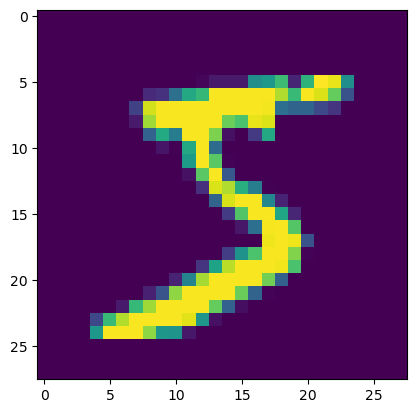

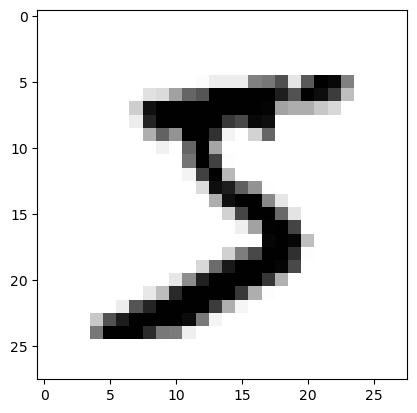

In [23]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [24]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

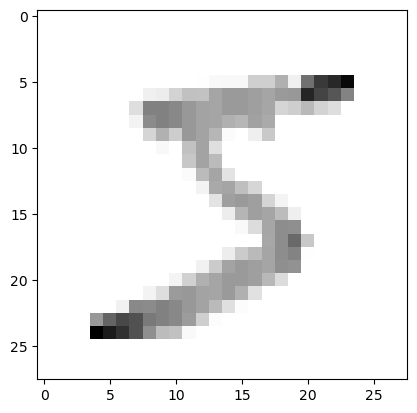

In [25]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [26]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [27]:
print(y_train[0])

5


In [28]:
import numpy as np
IMG_SIZE=28
x_trainr=np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr=np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1)
print("training samples dimension",x_trainr.shape)
print("tetsing samples dimension",x_testr.shape)

training samples dimension (60000, 28, 28, 1)
tetsing samples dimension (10000, 28, 28, 1)


In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Conv2D,MaxPooling2D

In [30]:
model=Sequential()

model.add(Conv2D(64,(3,3),input_shape=x_trainr.shape[1:]))##first convolution layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3))) ## second convolution layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))  ## third convolution layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())## before using fuuly connected layer,need to be flatten so that 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))## fully connected layer 1

model.add(Dense(32))##fully connected layer 2
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation('softmax'))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [32]:
print("total training samples=",len(x_trainr))

total training samples= 60000


In [33]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [34]:
model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)## training my model

Epoch 1/5
1313/1313 [==============================] - 79s 57ms/step - loss: 0.3178 - accuracy: 0.9001 - val_loss: 0.1161 - val_accuracy: 0.9651
Epoch 2/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.1039 - accuracy: 0.9681 - val_loss: 0.0948 - val_accuracy: 0.9722
Epoch 3/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0762 - accuracy: 0.9764 - val_loss: 0.0761 - val_accuracy: 0.9778
Epoch 4/5
1313/1313 [==============================] - 76s 58ms/step - loss: 0.0577 - accuracy: 0.9819 - val_loss: 0.0800 - val_accuracy: 0.9753
Epoch 5/5
1313/1313 [==============================] - 76s 58ms/step - loss: 0.0485 - accuracy: 0.9845 - val_loss: 0.0742 - val_accuracy: 0.9779


In [35]:
## evaluating on testing data
test_loss,test_acc=model.evaluate(x_testr,y_test)
print("test loss on 10000 test samples",test_loss)
print("validation accuracy on 10000 test samples",test_acc)

313/313 [==============================] - 6s 18ms/step - loss: 0.0659 - accuracy: 0.9810
test loss on 10000 test samples 0.06585682928562164
validation accuracy on 10000 test samples 0.9810000061988831


In [36]:
prediction=model.predict([x_testr])
print(prediction)

313/313 [==============================] - 6s 17ms/step
[[1.9861527e-06 3.2755572e-05 1.6808680e-04 ... 9.9948078e-01
  6.9160037e-06 2.1684982e-04]
 [4.4339431e-06 3.3112469e-06 9.9987912e-01 ... 2.1165965e-06
  8.1057813e-05 4.4712170e-08]
 [7.9240917e-06 9.9962687e-01 1.1428890e-05 ... 6.8893947e-05
  3.8636972e-05 2.5643911e-05]
 ...
 [8.0959524e-08 1.0867357e-07 6.4179222e-09 ... 2.8659537e-07
  5.5919963e-07 3.0688665e-05]
 [1.2211479e-03 3.3565061e-07 1.4981084e-06 ... 2.0931541e-06
  6.0175173e-03 3.0748291e-05]
 [1.2346941e-04 2.0526409e-07 1.2127492e-03 ... 5.7494467e-06
  4.0529159e-04 2.6965277e-05]]


In [37]:
print(np.argmax(prediction[0]))

7


In [38]:
print(np.argmax(prediction[128]))

8


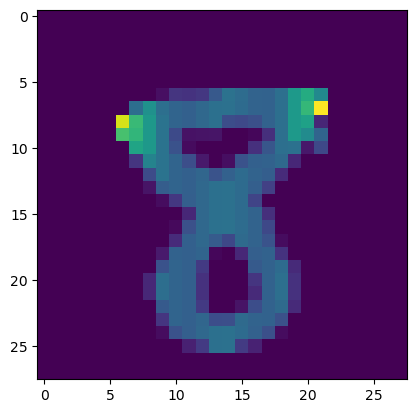

In [39]:
plt.imshow(x_test[128])


In [40]:
print(np.argmax(prediction[9999]))

6


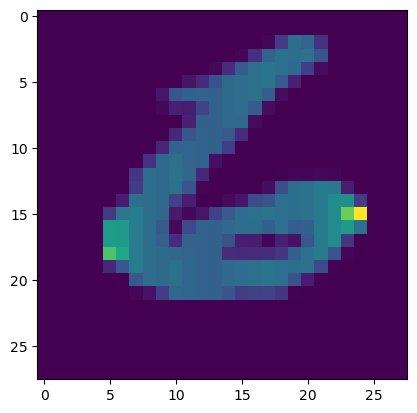

In [41]:
plt.imshow(x_test[9999])